## Parse Data

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [29]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240906_logic_validation')


cts = pd.read_csv(DRIVE_FOLDER / '20240906_iDEC_PhageProp_PANCE.txt', sep='\t', header=1)[['Pos', 'Cp']]
layout_plate = pd.read_excel(DRIVE_FOLDER / 'layout_plate.xlsx', header=None)





Mounted at /content/drive


In [30]:
cts = cts.rename(columns={'Pos': 'well', 'Cp': 'cp'})
cts = cts.set_index('well').cp
cts = list_to_plate(cts)
cts = cts.iloc[::-1, ::-1]
cts = set_plate_axes(cts)
cts

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,24.10,23.73,23.98,NaN,24.14,24.10,23.96,NaN,8.77,9.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,23.91,24.03,24.46,NaN,24.46,24.31,24.33,NaN,9.17,9.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,25.04,25.24,25.96,NaN,25.81,26.44,26.50,NaN,11.89,12.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,16.43,16.51,16.89,NaN,NaN,NaN,NaN,NaN,27.27,27.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,30.06,30.86,31.28,NaN,NaN,NaN,NaN,NaN,28.77,28.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
import numpy as np
cts1 = plate_to_list(set_plate_axes(cts.iloc[::2, :11])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts1

,well,cp
0,A1,24.10
1,A2,23.73
2,A3,23.98
3,A5,24.14
4,A6,24.10
5,A7,23.96
6,A9,8.77
7,A10,9.39
8,A11,9.19
9,B1,23.91


In [32]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta = parse_layout(layout_plate).reset_index().rename(columns={'index': 'well'})
meta = meta.rename(columns={'Phage': 'phage'})
for col in meta.columns:
  meta[col] = meta[col].str.strip()

meta

      1      2      3   4    5    6    7   8      9      10     11  12
A  S2060  S2060  S2060 NaN    -    -    - NaN  S2208  S2208  S2208 NaN
B  S2060  S2060  S2060 NaN    -    -    - NaN  S2208  S2208  S2208 NaN
C  S2060  S2060  S2060 NaN    -    -    - NaN  S2208  S2208  S2208 NaN
D    NaN    NaN    NaN NaN  NaN  NaN  NaN NaN    NaN    NaN    NaN NaN
E  S2060  S2060  S2060 NaN  NaN  NaN  NaN NaN  S2208  S2208  S2208 NaN
F    NaN    NaN    NaN NaN  NaN  NaN  NaN NaN    NaN    NaN    NaN NaN
G    NaN    NaN    NaN NaN  NaN  NaN  NaN NaN    NaN    NaN    NaN NaN
H    NaN    NaN    NaN NaN  NaN  NaN  NaN NaN    NaN    NaN    NaN NaN
      1      2      3   4      5      6      7   8      9      10     11  12
A  SIAH1  SIAH1  SIAH1 NaN  SIAH1  SIAH1  SIAH1 NaN  SIAH1  SIAH1  SIAH1 NaN
B  SIAH2  SIAH2  SIAH2 NaN  SIAH2  SIAH2  SIAH2 NaN  SIAH2  SIAH2  SIAH2 NaN
C   TadA   TadA   TadA NaN   TadA   TadA   TadA NaN   TadA   TadA   TadA NaN
D    NaN    NaN    NaN NaN    NaN    NaN    NaN NaN  

,well,strain,phage,substrate
0,A1,S2060,SIAH1,a-syn
1,A2,S2060,SIAH1,a-syn
2,A3,S2060,SIAH1,a-syn
3,A5,-,SIAH1,NaN
4,A6,-,SIAH1,NaN
5,A7,-,SIAH1,NaN
6,A9,S2208,SIAH1,NaN
7,A10,S2208,SIAH1,NaN
8,A11,S2208,SIAH1,NaN
9,B1,S2060,SIAH2,a-syn


In [44]:
list_to_plate(cts1.set_index('well').cp)

,1,2,3,5,6,7,9,10,11
A,24.10,23.73,23.98,24.14,24.10,23.96,8.77,9.39,9.19
B,23.91,24.03,24.46,24.46,24.31,24.33,9.17,9.12,10.48
C,25.04,25.24,25.96,25.81,26.44,26.50,11.89,12.61,12.28
D,16.43,16.51,16.89,NaN,NaN,NaN,27.27,27.52,27.22
E,30.06,30.86,31.28,NaN,NaN,NaN,28.77,28.94,29.64
F,31.49,30.57,32.20,NaN,NaN,NaN,29.03,29.67,30.19


In [33]:
df = pd.merge(cts1, meta, on='well')
df

,well,cp,strain,phage,substrate
0,A1,24.10,S2060,SIAH1,a-syn
1,A2,23.73,S2060,SIAH1,a-syn
2,A3,23.98,S2060,SIAH1,a-syn
3,A5,24.14,-,SIAH1,NaN
4,A6,24.10,-,SIAH1,NaN
5,A7,23.96,-,SIAH1,NaN
6,A9,8.77,S2208,SIAH1,NaN
7,A10,9.39,S2208,SIAH1,NaN
8,A11,9.19,S2208,SIAH1,NaN
9,B1,23.91,S2060,SIAH2,a-syn


## Compute Propagation

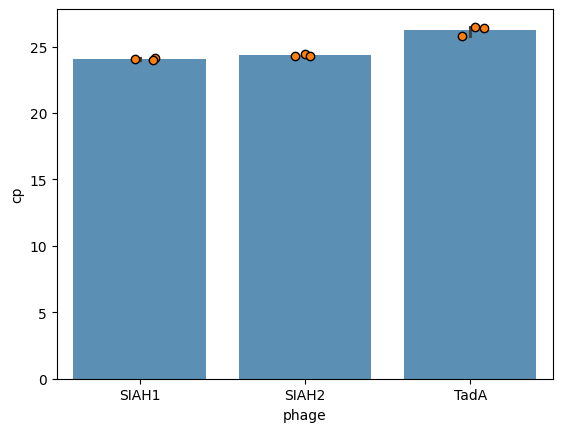

In [35]:
import seaborn as sns

_ = bars(df[df.strain == '-'], x='phage', y='cp')

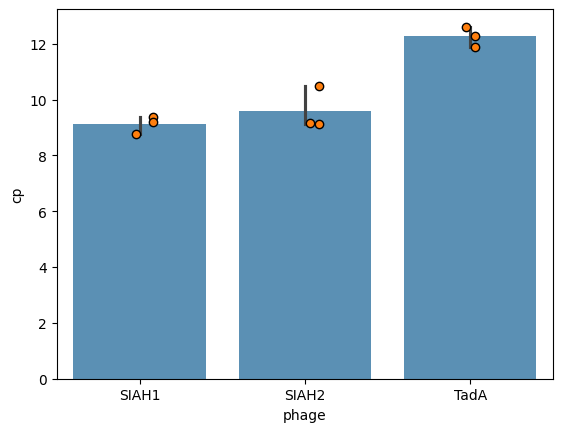

In [36]:
_ = bars(df[df.strain == 'S2208'], x='phage', y='cp')

In [37]:
df['cp_init'] = pd.NA
for phage in df.phage.unique():
  df.loc[df.phage == phage, 'cp_init'] = df[(df.phage == phage) & (df.strain == '-')].cp.mean()

df['fc_log2'] = df.cp_init - df.cp
df['fc'] = 2 ** df.fc_log2
df

,well,cp,strain,phage,substrate,cp_init,fc_log2,fc
0,A1,24.10,S2060,SIAH1,a-syn,24.066667,-0.033333,0.97716
1,A2,23.73,S2060,SIAH1,a-syn,24.066667,0.336667,1.262835
2,A3,23.98,S2060,SIAH1,a-syn,24.066667,0.086667,1.061914
3,A5,24.14,-,SIAH1,NaN,24.066667,-0.073333,0.950439
4,A6,24.10,-,SIAH1,NaN,24.066667,-0.033333,0.97716
5,A7,23.96,-,SIAH1,NaN,24.066667,0.106667,1.076738
6,A9,8.77,S2208,SIAH1,NaN,24.066667,15.296667,40249.037599
7,A10,9.39,S2208,SIAH1,NaN,24.066667,14.676667,26188.878634
8,A11,9.19,S2208,SIAH1,NaN,24.066667,14.876667,30083.121806
9,B1,23.91,S2060,SIAH2,a-syn,24.366667,0.456667,1.372367


In [ ]:
df.phage.unique()

array(['SIAH1', None, 'SIAH2', 'TadA'], dtype=object)

## Results


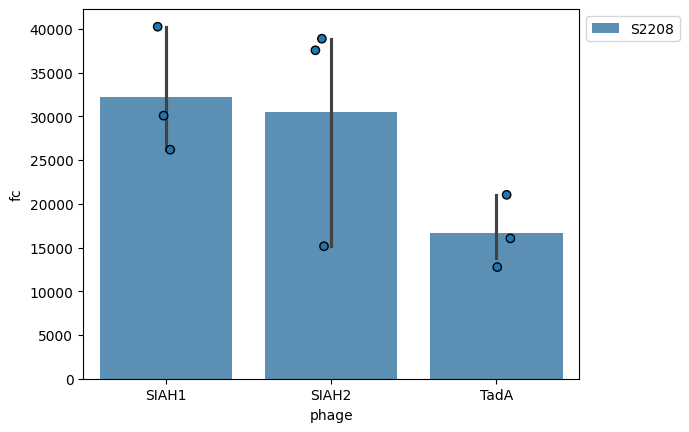

In [42]:
_ = bars(df[df.strain == 'S2208'], x='phage', y='fc', hue='strain')

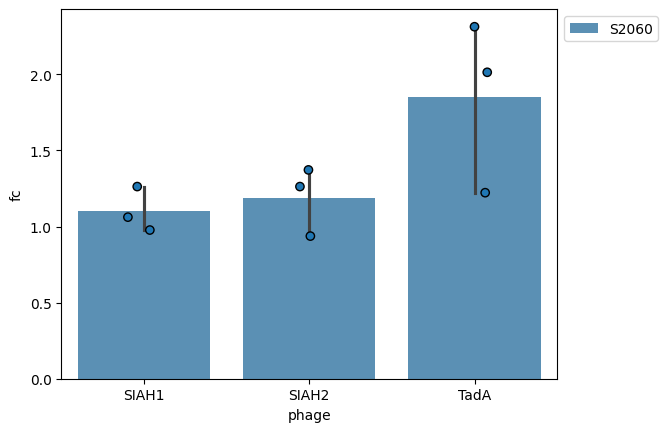

In [43]:
_ = bars(df[df.strain == 'S2060'], x='phage', y='fc', hue='strain')

## Promoters

Text(0.5, 1.0, 'a-syn tE1')

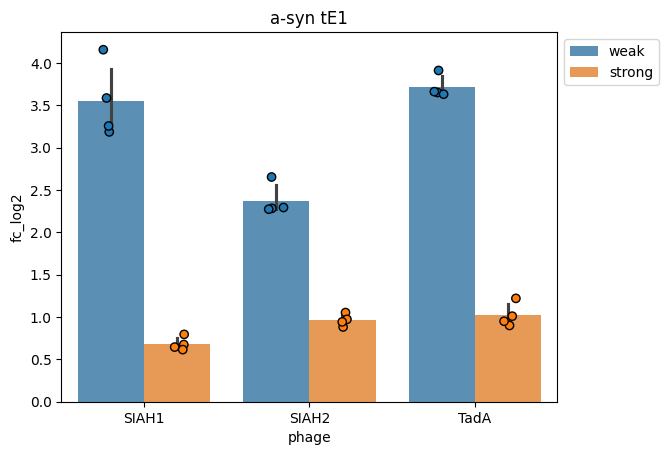

In [ ]:
ax = bars(df[(~df.promoter.isna()) & (df.level2 == 2009)], x='phage', y='fc_log2', hue='promoter')
ax.set_title('a-syn tE1')

Text(0.5, 1.0, 'a-syn hE1')

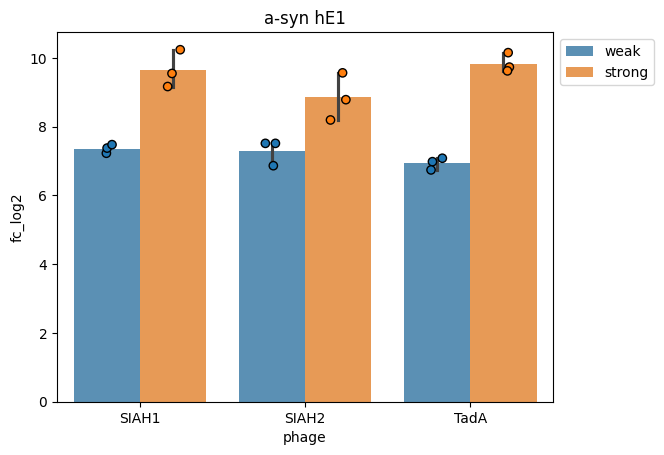

In [ ]:
ax = bars(df[(~df.promoter.isna()) & (df.level2 == 2008) & (df.substrate == 'asyn')], x='phage', y='fc_log2', hue='promoter')
ax.set_title('a-syn hE1')

In [ ]:
df[(~df.promoter.isna()) & (df.level2 == 2008) & (df.substrate == 'asyn') ]

,well,cp,plate,strain,phage,substrate,level2,qpcr replicate,promoter,cp_init,fc_log2,fc
108,B1,18.60,plate2,S2060-2008/1081,SIAH1,asyn,2008,NaN,weak,25.825,7.225,149.603488
109,B2,18.45,plate2,S2060-2008/1081,SIAH1,asyn,2008,r2,weak,25.825,7.375,165.995463
110,B3,18.35,plate2,S2060-2008/1081,SIAH1,asyn,2008,NaN,weak,25.825,7.475,177.909532
112,B5,19.87,plate2,S2060-2008/1081,SIAH2,asyn,2008,NaN,weak,26.7325,6.8625,116.363921
113,B6,19.22,plate2,S2060-2008/1081,SIAH2,asyn,2008,r10,weak,26.7325,7.5125,182.594563
114,B7,19.22,plate2,S2060-2008/1081,SIAH2,asyn,2008,NaN,weak,26.7325,7.5125,182.594563
116,B9,19.11,plate2,S2060-2008/1081,TadA,asyn,2008,NaN,weak,26.19,7.08,135.298309
117,B10,19.21,plate2,S2060-2008/1081,TadA,asyn,2008,r18,weak,26.19,6.98,126.237786
118,B11,19.45,plate2,S2060-2008/1081,TadA,asyn,2008,NaN,weak,26.19,6.74,106.891254
120,C1,16.66,plate2,S2060-2008/1035,SIAH1,asyn,2008,NaN,strong,25.825,9.165,574.037032


In [ ]:
ax = bars(df[(~df.promoter.isna()) & (df.level2 == 2008)], x='phage', y='fc_log2', hue='level')
ax.set_title('a-syn hE1')

Text(0.5, 1.0, 'a-syn hE1 weaka promoter')

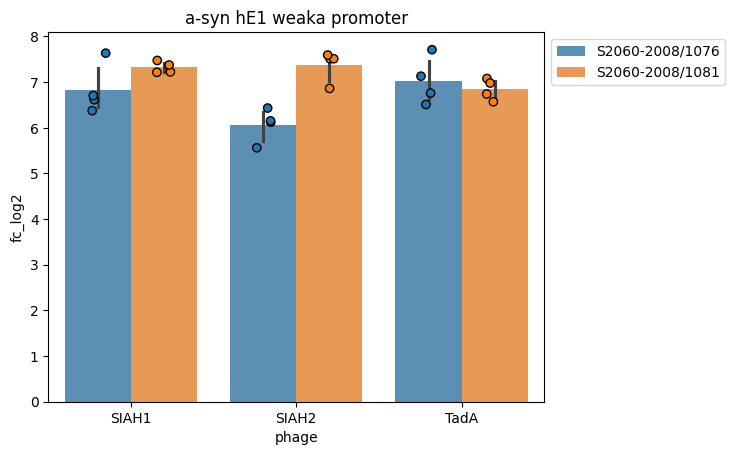

In [ ]:
ax = bars(df[(df.promoter =='weak') & (df.level2 == 2008)], x='phage', y='fc_log2', hue='strain')
ax.set_title('a-syn hE1 weak promoter')

Text(0.5, 1.0, 'weak promoter hE1')

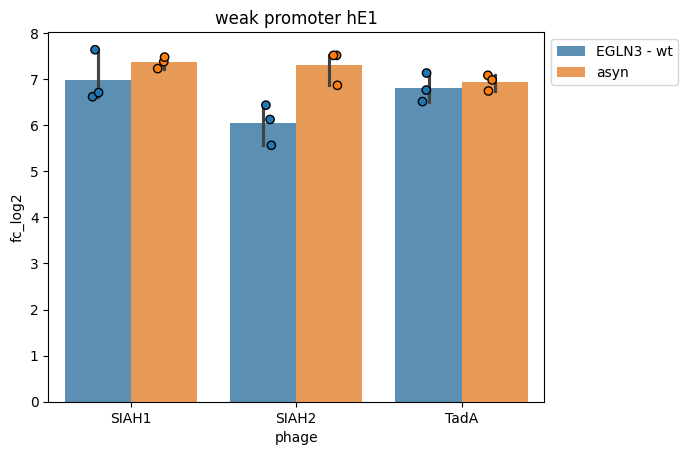

In [ ]:
ax = bars(df[(df.promoter == 'weak') & (df.level2 == 2008)], x='phage', y='fc_log2', hue='substrate')
ax.set_title('weak promoter hE1')

Text(0.5, 1.0, 'weak promoter hE1')

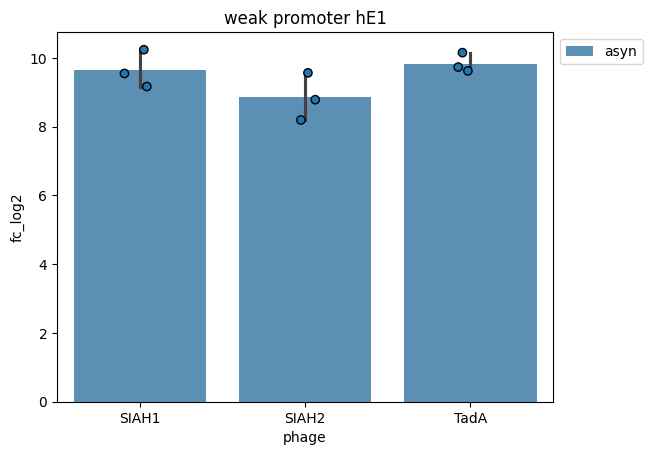

In [ ]:
ax = bars(df[(df.promoter == 'strong') & (df.level2 == 2008)], x='phage', y='fc_log2', hue='substrate')
ax.set_title('weak promoter hE1')

Text(0.5, 1.0, 'strong promoter a-syn')

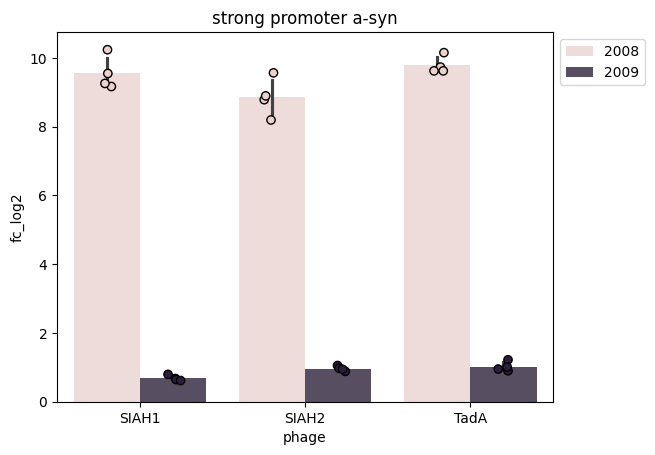

In [ ]:
ax = bars(df[(df.promoter == 'strong')], x='phage', y='fc_log2', hue='level2')
ax.set_title('strong promoter a-syn')

In [ ]:
df[(df.promoter == 'strong')]

,well,cp,plate,strain,phage,substrate,level2,qpcr replicate,promoter,cp_init,fc_log2,fc
120,C1,16.66,plate2,S2060-2008/1035,SIAH1,asyn,2008,NaN,strong,25.825,9.165,574.037032
121,C2,16.28,plate2,S2060-2008/1035,SIAH1,asyn,2008,r3,strong,25.825,9.545,747.018416
122,C3,15.59,plate2,S2060-2008/1035,SIAH1,asyn,2008,NaN,strong,25.825,10.235,1205.152499
123,C4,16.57,plate2,S2060-2008/1035,SIAH1,NaN,2008,r3,strong,25.825,9.255,610.9879
124,C5,17.17,plate2,S2060-2008/1035,SIAH2,asyn,2008,NaN,strong,26.7325,9.5625,756.134987
125,C6,17.95,plate2,S2060-2008/1035,SIAH2,asyn,2008,r11,strong,26.7325,8.7825,440.347907
126,C7,18.54,plate2,S2060-2008/1035,SIAH2,asyn,2008,NaN,strong,26.7325,8.1925,292.542009
127,C8,17.84,plate2,S2060-2008/1035,SIAH2,NaN,2008,r11,strong,26.7325,8.8925,475.235896
128,C9,16.46,plate2,S2060-2008/1035,TadA,asyn,2008,NaN,strong,26.19,9.73,849.223215
129,C10,16.57,plate2,S2060-2008/1035,TadA,asyn,2008,r19,strong,26.19,9.62,786.880093
